<a href="https://colab.research.google.com/github/PRITHASAMANTA/gold-price-detection/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [22]:
# Data collection and processing//

#loading the csv data //

gold_data = pd.read_csv('/content/gld_price_data.csv')

In [23]:
# print first 5 rowns in the data frame

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [25]:
#basic information

gold_data.shape

(2290, 6)

In [26]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [27]:
# check number of missing values

gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [28]:
#getting statistical measures

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#corelation

#1.positive and
#2.negative

In [32]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

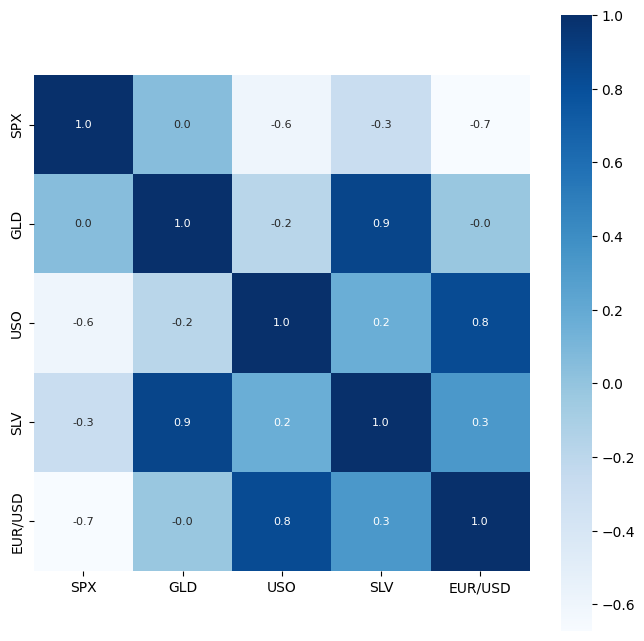

In [33]:
import matplotlib.pyplot as plt # import the pyplot module from matplotlib
import seaborn as sns # Import seaborn

# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8)) # call the figure function inside the plt module
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
#co relation for gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-35-7de223e0ded2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

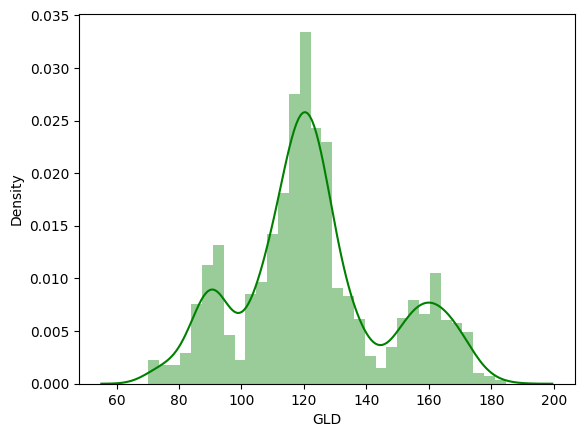

In [35]:
# check the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

In [36]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#Splitting into Training and Testing


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#Random forest Regressor


In [42]:
regressor = RandomForestRegressor(n_estimators=100)


In [43]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [44]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [45]:
print(test_data_prediction)

[168.19979939  82.18899975 115.90689984 127.7427008  120.86000148
 154.75459777 150.34629755 126.10440001 117.35889859 126.09920066
 116.58390096 172.39810116 141.67319859 167.71239825 114.89790008
 117.63670058 138.41460358 169.88370021 159.83340324 158.48619995
 154.98019981 125.43860018 176.48599906 157.05960374 125.16510065
  93.80529945  77.93799993 120.53040003 119.14489956 167.41319967
  88.18730108 125.25260009  91.14000056 117.6916002  121.10349966
 136.58510044 115.41340128 115.00950073 146.70610045 107.21950132
 104.63200227  87.11039788 126.39560069 117.68489973 152.82649889
 119.69209985 108.37999954 108.32329881  93.17170051 127.01519806
  75.24010054 113.68519897 121.10040021 111.30739911 118.84449905
 120.65909968 160.04950006 168.02570174 146.93969661  86.02899864
  94.18090041  86.834199    90.64430014 118.9603007  126.43730057
 127.55750014 170.00419976 122.34149925 117.54649882  98.69260021
 168.56170203 143.08509864 132.26610227 121.20020205 121.06499965
 119.95920

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890060729823458


In [47]:
Y_test = list(Y_test)

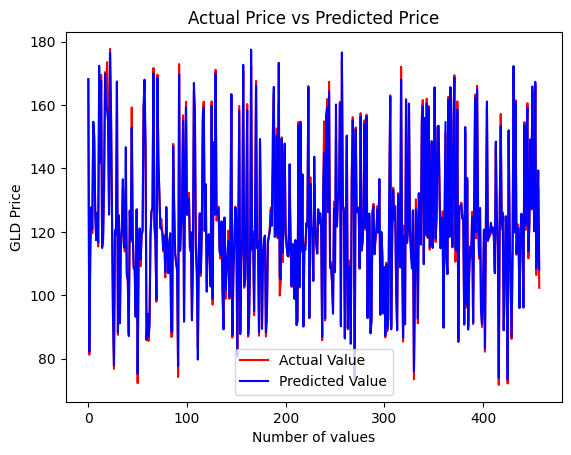

In [49]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

R squared error :  0.9890060729823458
Mean Absolute Error: 1.3396773946069813
Mean Squared Error: 5.798675352121699
Root Mean Squared Error: 2.4080438850074346


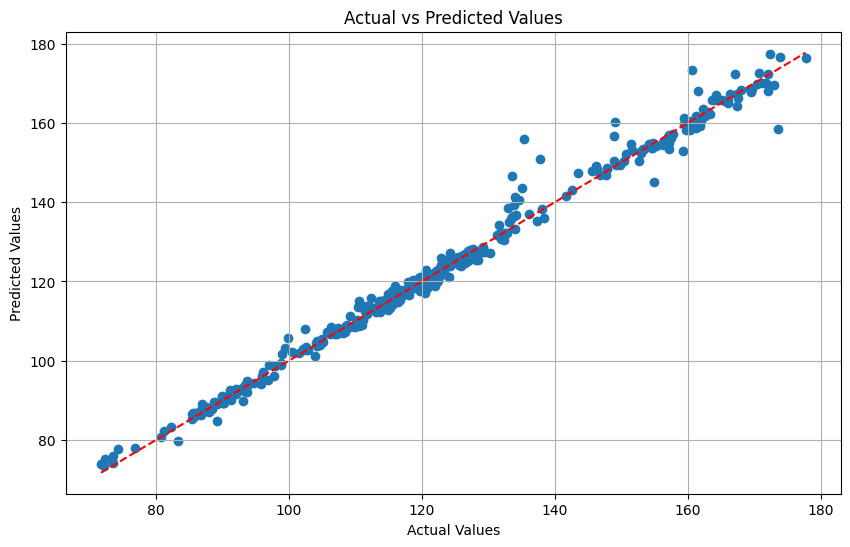

In [51]:
# prompt: how i can measure the accuracy  based upon the above data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# ... (rest of your existing code)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


# Visualize the differences between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')  # Add a diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()